In [1]:
import numpy as np

# Why Numpy?

In [ ]:
# Vector operation

a = [1, 2, 3]
b = [4, 5, 6]

a + b = ?


# Broadcast
a_np = np.array(a)
b_np = np.array(b)

a_np + b_np = ?

# Numpy Array and Matrix

In [19]:
a0_np = np.array([[1, 2], [3, 4]])

m0_np = np.matrix([[1, 3], [4, 5]])

print(a0_np.shape)


a0 = a0_np.tolist()
m0 = m0_np.tolist()

(2, 2)


# Operations Along Dimension

In [5]:
m0_np.min(axis=0)

matrix([[1, 3]])

# Flatten

In [18]:
print(a0_np.flatten())

[1 2 3 4]


# Some Linear-Algebra Operations

In [16]:
a_np = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b_np = np.array([[1, 3, 2], [4, 1, 3], [-2, 1, 4]])

# Transpose
print(a_np.T)

# Eigen-value and vector
e_val , e_vec = np.linalg.eig(a_np)

print(e_val)
print(e_vec)

# Determinant
print(np.linalg.det(b_np))

# Inverse
print(np.linalg.inv(b_np))
print(np.linalg.pinv(a_np))


[[1 4 7]
 [2 5 8]
 [3 6 9]]
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-53.00000000000001
[[-0.01886792  0.18867925 -0.13207547]
 [ 0.41509434 -0.1509434  -0.09433962]
 [-0.11320755  0.13207547  0.20754717]]
[[-6.38888889e-01 -1.66666667e-01  3.05555556e-01]
 [-5.55555556e-02  4.20756436e-17  5.55555556e-02]
 [ 5.27777778e-01  1.66666667e-01 -1.94444444e-01]]


# Exercise

Write a simple program to get the inverse of a given np matrix/2D-array. You solution must do the followings
- Check if either a matrix or 2D-array is provided
- Check if the given array has true inverse
- Show true inverse if that exists, else show pseudo-inverse




In [32]:
# Your solution

# Some Other Fun Things I: Linear Transformation

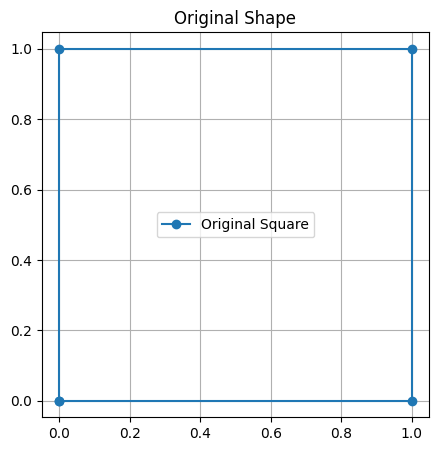

In [22]:
import matplotlib.pyplot as plt

square = np.array([
    [0, 0],
    [1, 0],
    [1, 1],
    [0, 1],
    [0, 0]
])

plt.figure(figsize=(5, 5))
plt.plot(square[:, 0], square[:, 1], marker='o', label='Original Square')
plt.title('Original Shape')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

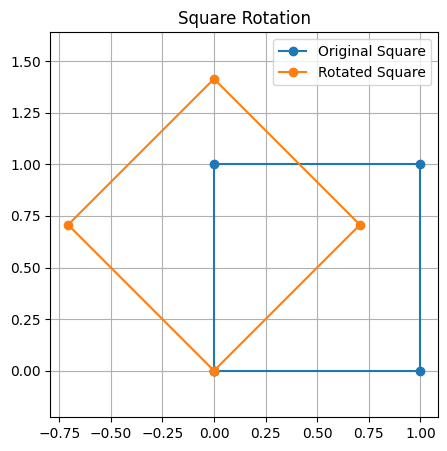

In [23]:
theta = np.radians(45)

# Rotation matrix
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta),  np.cos(theta)]
])

# Apply rotation
rotated_square = square @ rotation_matrix.T  # Use @ for matrix multiplication

# Plot rotated square
plt.figure(figsize=(5, 5))
plt.plot(square[:, 0], square[:, 1], marker='o', label='Original Square')
plt.plot(rotated_square[:, 0], rotated_square[:, 1], marker='o', label='Rotated Square')
plt.title('Square Rotation')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

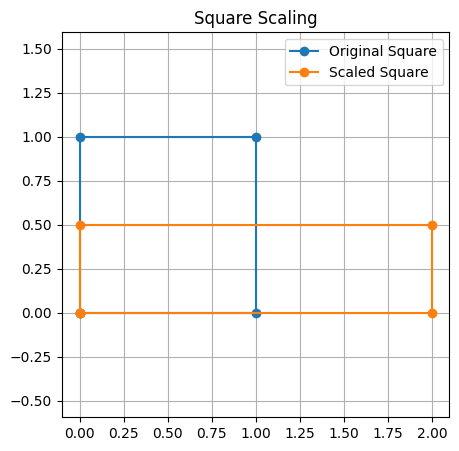

In [24]:
# Scaling matrix
scaling_matrix = np.array([
    [2, 0],
    [0, 0.5]
])

# Apply scaling
scaled_square = square @ scaling_matrix.T

# Plot scaled square
plt.figure(figsize=(5, 5))
plt.plot(square[:, 0], square[:, 1], marker='o', label='Original Square')
plt.plot(scaled_square[:, 0], scaled_square[:, 1], marker='o', label='Scaled Square')
plt.title('Square Scaling')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

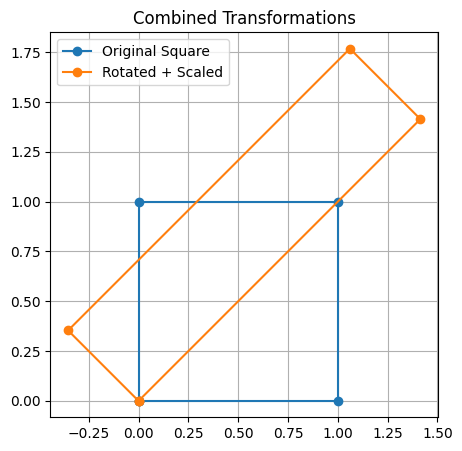

In [25]:
# Combine rotation and scaling
combined_transform = rotation_matrix @ scaling_matrix

# Apply the combined transformation
transformed_square = square @ combined_transform.T

# Plot all transformations
plt.figure(figsize=(5, 5))
plt.plot(square[:, 0], square[:, 1], marker='o', label='Original Square')
plt.plot(transformed_square[:, 0], transformed_square[:, 1], marker='o', label='Rotated + Scaled')
plt.title('Combined Transformations')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

# Some Other Fun Things II: EigenValues and EigenVectors

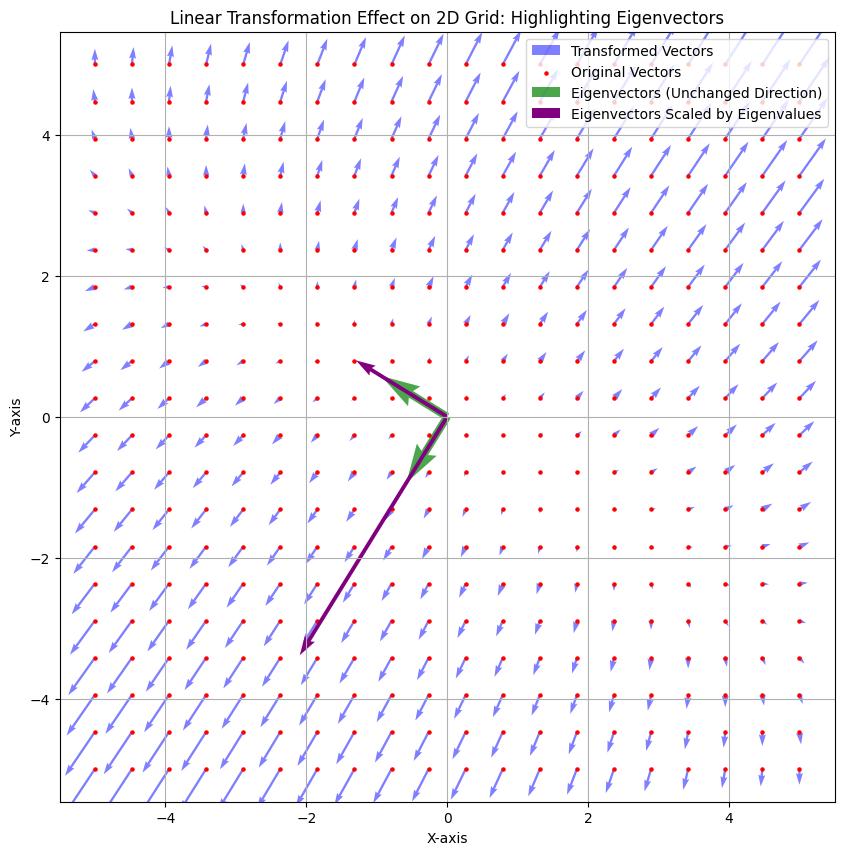

In [52]:
# Define the linear transformation matrix
A = np.array([[2, 1],
              [1, 3]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Create a grid of vectors
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)

# Flatten grid to apply transformation
points = np.vstack([X.ravel(), Y.ravel()]).T

# Apply the linear transformation
transformed_points = points @ A.T

# Compute displacements for visualization
U = transformed_points[:, 0] - points[:, 0]
V = transformed_points[:, 1] - points[:, 1]

# Reshape to grid shape for quiver plotting
U = U.reshape(X.shape)
V = V.reshape(Y.shape)

# Plotting the vectors before and after transformation
plt.figure(figsize=(10, 10))
plt.quiver(X, Y, U, V, color='blue', alpha=0.5, label='Transformed Vectors')
plt.scatter(X, Y, color='red', s=5, label='Original Vectors')

# Plot eigenvectors
origin = np.array([[0, 0], [0, 0]])  # Origin for arrows
scaled_eigenvectors = eigenvectors * eigenvalues  # Scale by eigenvalues to show effect

plt.quiver(*origin, eigenvectors[0, :], eigenvectors[1, :],
           color='green', scale=10, width=0.01, alpha=0.7, label='Eigenvectors (Unchanged Direction)')

plt.quiver(*origin, scaled_eigenvectors[0, :], scaled_eigenvectors[1, :],
           color='purple', scale=10, width=0.005, label='Eigenvectors Scaled by Eigenvalues')

# Formatting the plot
plt.title('Linear Transformation Effect on 2D Grid: Highlighting Eigenvectors')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()